In [ ]:
import pandas as pd
df = pd.read_csv("/content/sample_data/UNR-IDD.csv")

In [ ]:
df.head()

,Switch ID,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Packets Rx Dropped,Packets Tx Dropped,Packets Rx Errors,...,Unknown Load/Latest,Latest bytes counter,is_valid,Table ID,Active Flow Entries,Packets Looked Up,Packets Matched,Max Size,Label,Binary Label
0,of:000000000000000c,Port#:1,132,9181,6311853,238,46,0,0,0,...,0,0,True,0,9,767,688,-1,TCP-SYN,Attack
1,of:000000000000000c,Port#:2,187,6304498,15713,171,46,0,0,0,...,0,0,True,0,9,767,688,-1,TCP-SYN,Attack
2,of:000000000000000c,Port#:3,235,6311567,8030,58,46,0,0,0,...,0,0,True,0,9,767,688,-1,TCP-SYN,Attack
3,of:000000000000000c,Port#:4,59,7878,16439,182,46,0,0,0,...,0,0,True,0,9,767,688,-1,TCP-SYN,Attack
4,of:000000000000000a,Port#:1,188,6304547,16497,183,46,0,0,0,...,0,0,True,0,7,489,403,-1,TCP-SYN,Attack


In [ ]:
df['Label'].unique()

array(['TCP-SYN', 'Blackhole', 'Diversion', 'Overflow', 'Normal',
       'PortScan'], dtype=object)

In [ ]:
df['Binary Label'].unique()

array(['Attack', 'Normal'], dtype=object)

In [ ]:
df['Label'].value_counts()

,count
Label,
PortScan,9500
TCP-SYN,9081
Blackhole,8420
Diversion,5615
Normal,3773
Overflow,1022


In [ ]:
# Drop all duplicates in the data
df.drop_duplicates(inplace=True)

In [ ]:
# Check if there is a null in the data
df.isnull().sum()

,0
Switch ID,0
Port Number,0
Received Packets,0
Received Bytes,0
Sent Bytes,0
Sent Packets,0
Port alive Duration (S),0
Packets Rx Dropped,0
Packets Tx Dropped,0
Packets Rx Errors,0


<ipython-input-8-ab0a66f90ee6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Binary Label", palette="husl")


<Axes: xlabel='Binary Label', ylabel='count'>

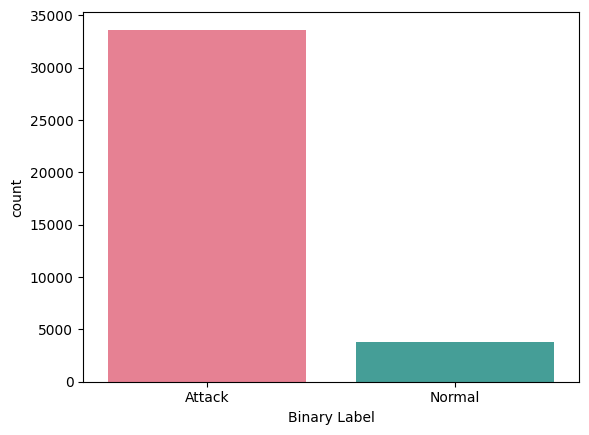

In [ ]:
import seaborn as sns
# Display "Binary Label" column
sns.countplot(data=df, x="Binary Label", palette="husl")

<ipython-input-9-20e055e7b459>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Label", palette="husl")


<Axes: xlabel='Label', ylabel='count'>

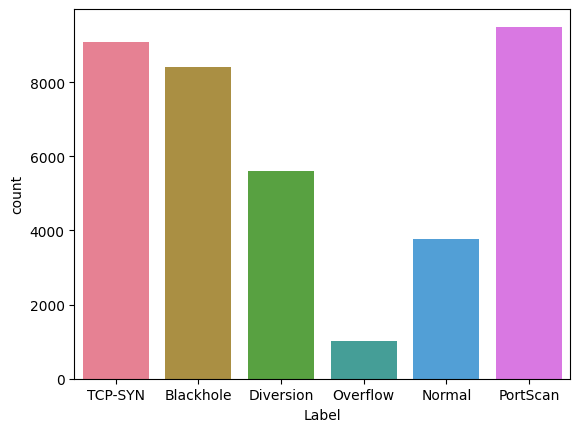

In [ ]:
# Display "Label" column
sns.countplot(data=df, x="Label", palette="husl")

In [ ]:
#Split Attack and Normal from the dataframe
data_attack = df[df['Binary Label'] == 'Attack']
data_normal = df[df['Binary Label'] == 'Normal']

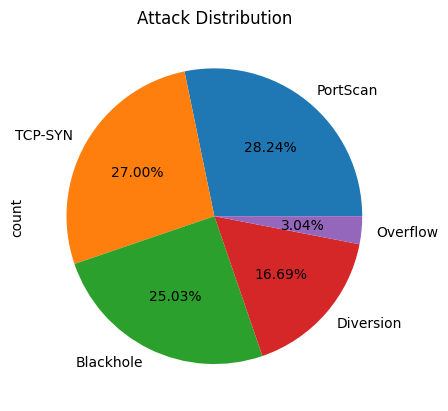

In [ ]:
import matplotlib.pyplot as plt
# Display attack distribution in pie chart
data_attack['Label'].value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.title("Attack Distribution")
plt.show()

In [ ]:
data_tcpsyn_attack = df[df['Label'] == 'TCP-SYN']

In [ ]:
data_tcpsyn_attack.head()

,Switch ID,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Packets Rx Dropped,Packets Tx Dropped,Packets Rx Errors,...,Unknown Load/Latest,Latest bytes counter,is_valid,Table ID,Active Flow Entries,Packets Looked Up,Packets Matched,Max Size,Label,Binary Label
0,of:000000000000000c,Port#:1,132,9181,6311853,238,46,0,0,0,...,0,0,True,0,9,767,688,-1,TCP-SYN,Attack
1,of:000000000000000c,Port#:2,187,6304498,15713,171,46,0,0,0,...,0,0,True,0,9,767,688,-1,TCP-SYN,Attack
2,of:000000000000000c,Port#:3,235,6311567,8030,58,46,0,0,0,...,0,0,True,0,9,767,688,-1,TCP-SYN,Attack
3,of:000000000000000c,Port#:4,59,7878,16439,182,46,0,0,0,...,0,0,True,0,9,767,688,-1,TCP-SYN,Attack
4,of:000000000000000a,Port#:1,188,6304547,16497,183,46,0,0,0,...,0,0,True,0,7,489,403,-1,TCP-SYN,Attack


In [ ]:
data_tcpsyn_attack.columns

Index(['Switch ID', 'Port Number', 'Received Packets', 'Received Bytes',
       'Sent Bytes', 'Sent Packets', 'Port alive Duration (S)',
       'Packets Rx Dropped', 'Packets Tx Dropped', 'Packets Rx Errors',
       'Packets Tx Errors', 'Delta Received Packets', 'Delta Received Bytes',
       'Delta Sent Bytes', 'Delta Sent Packets',
       'Delta Port alive Duration (S)', 'Delta Packets Rx Dropped',
       ' Delta Packets Tx Dropped', 'Delta Packets Rx Errors',
       'Delta Packets Tx Errors', 'Connection Point', 'Total Load/Rate',
       'Total Load/Latest', 'Unknown Load/Rate', 'Unknown Load/Latest',
       'Latest bytes counter', 'is_valid', 'Table ID', 'Active Flow Entries',
       'Packets Looked Up', 'Packets Matched', 'Max Size', 'Label',
       'Binary Label'],
      dtype='object')

In [ ]:
selected_columns = [
    'Received Packets', 'Delta Received Packets', 'Received Bytes', 'Delta Received Bytes',
    'Sent Packets', 'Delta Sent Packets', 'Packets Rx Dropped', 'Delta Packets Rx Dropped',
    'Port alive Duration (S)', 'Delta Port alive Duration (S)', 'Packets Rx Errors', 'Delta Packets Rx Errors',
    'Total Load/Rate', 'Unknown Load/Rate', 'Active Flow Entries'
]
data_tcpsyn_attack_selected = data_tcpsyn_attack[selected_columns]
data_tcpsyn_attack_selected.head()

,Received Packets,Delta Received Packets,Received Bytes,Delta Received Bytes,Sent Packets,Delta Sent Packets,Packets Rx Dropped,Delta Packets Rx Dropped,Port alive Duration (S),Delta Port alive Duration (S),Packets Rx Errors,Delta Packets Rx Errors,Total Load/Rate,Unknown Load/Rate,Active Flow Entries
0,132,0,9181,0,238,2,0,0,46,5,0,0,0,0,9
1,187,146,6304498,5908166,171,84,0,0,46,5,0,0,0,0,9
2,235,2,6311567,278,58,2,0,0,46,5,0,0,0,0,9
3,59,2,7878,278,182,2,0,0,46,5,0,0,0,0,9
4,188,0,6304547,0,183,2,0,0,46,5,0,0,0,0,7


In [ ]:
data_tcpsyn_attack_selected.count()

,0
Received Packets,9081
Delta Received Packets,9081
Received Bytes,9081
Delta Received Bytes,9081
Sent Packets,9081
Delta Sent Packets,9081
Packets Rx Dropped,9081
Delta Packets Rx Dropped,9081
Port alive Duration (S),9081
Delta Port alive Duration (S),9081


In [ ]:
selected_columns = [
    'Received Packets', 'Delta Received Packets', 'Received Bytes', 'Delta Received Bytes',
    'Sent Packets', 'Delta Sent Packets', 'Packets Rx Dropped', 'Delta Packets Rx Dropped',
    'Port alive Duration (S)', 'Delta Port alive Duration (S)', 'Packets Rx Errors', 'Delta Packets Rx Errors',
    'Total Load/Rate', 'Unknown Load/Rate', 'Active Flow Entries'
]
data_normal_selected = data_normal[selected_columns]
data_normal_selected.head()

,Received Packets,Delta Received Packets,Received Bytes,Delta Received Bytes,Sent Packets,Delta Sent Packets,Packets Rx Dropped,Delta Packets Rx Dropped,Port alive Duration (S),Delta Port alive Duration (S),Packets Rx Errors,Delta Packets Rx Errors,Total Load/Rate,Unknown Load/Rate,Active Flow Entries
24138,239,65,16570,4567,407950,135,0,0,767,5,0,0,564562,564562,6
24139,188,0,6304558,0,407718,4,0,0,767,5,0,0,0,0,6
24140,173034,133,19893106,5252096,282852,4,0,0,767,5,0,0,0,0,6
24141,348664,2,14678238,278,210660,69,0,0,767,5,0,0,516,516,6
24142,190,0,6304713,0,244416,3,0,0,765,5,0,0,0,0,4


In [ ]:
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

In [ ]:
# Data Preparation
# Merge TCP-SYN attack data and normal data into one data frame
data_tcpsyn_attack_selected['Binary Label'] = 1  # labeled Attack as 1
data_normal_selected['Binary Label'] = 0         # labeled Normal as 0
data_combined = pd.concat([data_tcpsyn_attack_selected, data_normal_selected])

<ipython-input-19-c8d48a44d90d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tcpsyn_attack_selected['Binary Label'] = 1  # Attack은 1로 라벨링
<ipython-input-19-c8d48a44d90d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_normal_selected['Binary Label'] = 0         # Normal은 0으로 라벨링


In [ ]:
# Separate features and labels
X = data_combined.drop(columns=['Binary Label']).values  # feature data
y = data_combined['Binary Label'].values                 # label data

In [ ]:
# Data standardization (scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Convert to tensor
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

In [ ]:
# Weight calculation
# This is due to the difference in the number of TCP-SYN data (9081) and the number of Normal data (3773).
# When learning the model, the weights are set differently for each class to compensate for the data imbalance.
# Since there are 3773 Normal data and 9081 TCP-SYN Attack data, weights that are inversely proportional to each are calculated.
class_counts = np.bincount(y_train.astype(int))
class_weights = [len(y_train) / (len(np.unique(y_train)) * count) for count in class_counts]
class_weights_tensor = torch.tensor(class_weights, dtype=torch.float32)

In [ ]:
#1. Define Transformer architecture
class TransformerModel(nn.Module):
    def __init__(self, input_dim, num_heads, num_layers, hidden_dim):
        super(TransformerModel, self).__init__()
        self.embedding = nn.Linear(input_dim, hidden_dim)
        encoder_layer = nn.TransformerEncoderLayer(d_model=hidden_dim, nhead=num_heads)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.fc = nn.Linear(hidden_dim, 1)  # Output layer for binary classification

    def forward(self, x):
        x = self.embedding(x).unsqueeze(1)  # Dimension expansion after applying embedding layer
        x = self.transformer_encoder(x)  # Transformer encoder
        x = x.mean(dim=1)  # Pooling
        x = self.fc(x)
        return x

In [ ]:
# Create a model instance
input_dim = X_train_tensor.shape[1]  # Number of features in the input data
model = TransformerModel(input_dim=input_dim, num_heads=4, num_layers=2, hidden_dim=64)  # Adjust parameters as needed

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


In [ ]:
# Train setting
criterion = nn.BCEWithLogitsLoss(pos_weight=class_weights_tensor[1]) # Applying weights to TCP-SYN attacks
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# 3. Train
epochs = 20
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train_tensor)
    loss = criterion(output.view(-1), y_train_tensor)
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item()}")

In [ ]:
# 4. Test
model.eval()
with torch.no_grad():
    test_output = model(X_test_tensor)
    predictions = torch.sigmoid(test_output).view(-1).numpy()
    predictions = (predictions > 0.5).astype(int)  # If it is greater than 0.5, label it as 1
    accuracy = (predictions == y_test).mean()
    print(f"Test Accuracy: {accuracy}")